In [1]:
import pandas as pd
import numpy as np

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text

#nltk libraries 
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#Import graphing python script
import autoreload
%load_ext autoreload
%autoreload 2

import graphing as gh   

In [2]:
#Want to display the full contents of the column 
# Thanks to: https://stackoverflow.com/questions/25351968/how-can-i-display-full-non-truncated-dataframe-information-in-html-when-conver
pd.set_option('display.max_colwidth', None)

In [3]:
friends = pd.read_csv('https://raw.githubusercontent.com/emorynlp/character-mining/master/tsv/friends_transcripts.tsv',delimiter='\t')

In [4]:
friends.head()

,season_id,episode_id,scene_id,utterance_id,speaker,tokens,transcript
0,s01,e01,c01,u001,Monica Geller,"[['There', ""'s"", 'nothing', 'to', 'tell', '!'], ['He', ""'s"", 'just', 'some', 'guy', 'I', 'work', 'with', '!']]",There's nothing to tell! He's just some guy I work with!
1,s01,e01,c01,u002,Joey Tribbiani,"[[""C'mon"", ',', 'you', ""'re"", 'going', 'out', 'with', 'the', 'guy', '!'], ['There', ""'s"", 'got', 'ta', 'be', 'something', 'wrong', 'with', 'him', '!']]","C'mon, you're going out with the guy! There's gotta be something wrong with him!"
2,s01,e01,c01,u003,Chandler Bing,"[['All', 'right', 'Joey', ',', 'be', 'nice', '.'], ['So', 'does', 'he', 'have', 'a', 'hump', '?'], ['A', 'hump', 'and', 'a', 'hairpiece', '?']]","All right Joey, be nice. So does he have a hump? A hump and a hairpiece?"
3,s01,e01,c01,u004,Phoebe Buffay,"[['Wait', ',', 'does', 'he', 'eat', 'chalk', '?']]","Wait, does he eat chalk?"
4,s01,e01,c01,u005,unknown,[],NaN


In [5]:
friends.shape

(67373, 7)

In [6]:
friends.isnull().sum()

season_id          0
episode_id         0
scene_id           0
utterance_id       0
speaker            0
tokens             0
transcript      6063
dtype: int64

In [7]:
friends['speaker'].unique()

array(['Monica Geller', 'Joey Tribbiani', 'Chandler Bing',
       'Phoebe Buffay', 'unknown', '#ALL#', 'Ross Geller', 'Rachel Green',
       'Waitress', 'Paul the Wine Guy', 'Priest On Tv', 'Franny',
       'Customer', 'Marsha', 'Carol Willick', 'Judy Geller',
       'Susan Bunch', 'Barry Farber', 'Robbie', 'Bernice', 'Dr. Oberman',
       'Paula', 'Alan', 'The Guys', 'Lizzy', 'Guys', 'Leslie', 'Kiki',
       'Joanne', 'Receptionist', 'Pizza Guy', 'Both', 'Kid',
       'Angela Delveccio', 'Janice Litman Goralnik', 'Woman', 'Bob',
       'Aurora', 'Director', 'Jill Goodacre', 'Mr. Heckles', 'Paolo',
       'Shelley', 'Aunt Lillian', 'Nurse Sizemore', 'Andrea', 'Lowell',
       'Terry', 'Guy', 'Girl', 'Max', 'David', 'Sandy', 'Bobby Rush',
       'Dick Clark', 'Jay Leno', 'Nora Tyler Bing', 'Coma Guy',
       "Phoebe's Assistant", 'Roger', 'Joey Tribbiani Sr.',
       'Ronni Rapalono', 'Gloria Tribbiani', 'Lorraine', 'Kristin',
       'Fireman No. 1', 'Fireman No. 2', 'Fireman No. 3', 'M

I will be creating a new dataframe with only the main cast involved. I want to focus soley on them. I will also not be worrying about the tokens column, the utterance column, and the scene column since it does not have an importance in my project. I will also rename the columns to my liking.

In [8]:
main_characters = ['Monica Geller', 'Joey Tribbiani', 'Chandler Bing',
       'Phoebe Buffay', 'Ross Geller', 'Rachel Green']
main_cast = friends[['season_id','episode_id','speaker','transcript']].loc[friends['speaker'].isin(main_characters)].copy()

In [9]:
main_cast.head()

,season_id,episode_id,speaker,transcript
0,s01,e01,Monica Geller,There's nothing to tell! He's just some guy I work with!
1,s01,e01,Joey Tribbiani,"C'mon, you're going out with the guy! There's gotta be something wrong with him!"
2,s01,e01,Chandler Bing,"All right Joey, be nice. So does he have a hump? A hump and a hairpiece?"
3,s01,e01,Phoebe Buffay,"Wait, does he eat chalk?"
5,s01,e01,Phoebe Buffay,"Just, 'cause, I don't want her to go through what I went through with Carl- oh!"


In [10]:
col_rename = {'season_id': 'season',
             'episode_id': 'episode',
             'speaker': 'character',
             'transcript': 'dialogue'}
main_cast.rename(columns=col_rename, inplace=True)

In [11]:
main_cast.head()

,season,episode,character,dialogue
0,s01,e01,Monica Geller,There's nothing to tell! He's just some guy I work with!
1,s01,e01,Joey Tribbiani,"C'mon, you're going out with the guy! There's gotta be something wrong with him!"
2,s01,e01,Chandler Bing,"All right Joey, be nice. So does he have a hump? A hump and a hairpiece?"
3,s01,e01,Phoebe Buffay,"Wait, does he eat chalk?"
5,s01,e01,Phoebe Buffay,"Just, 'cause, I don't want her to go through what I went through with Carl- oh!"


In [12]:
main_cast.shape

(51312, 4)

In [13]:
main_cast.isnull().sum()

season        0
episode       0
character     0
dialogue     15
dtype: int64

In [14]:
main_cast.loc[main_cast['dialogue'].isnull()]

,season,episode,character,dialogue
2436,s01,e10,Phoebe Buffay,NaN
2439,s01,e10,Phoebe Buffay,NaN
6106,s01,e23,Phoebe Buffay,NaN
6493,s01,e24,Ross Geller,NaN
21909,s04,e08,Joey Tribbiani,NaN
22014,s04,e08,Rachel Green,NaN
35909,s06,e07,Joey Tribbiani,NaN
51411,s08,e11,Rachel Green,NaN
55837,s09,e03,Joey Tribbiani,NaN
55844,s09,e03,Joey Tribbiani,NaN


In [15]:
#Will be dropping the rows with null dialouge; it will not affect my models as much since 
#it is only 15 rows out of 51,312
main_cast.dropna(inplace=True)

In [16]:
main_cast.reset_index(inplace=True, drop=True)

In [17]:
#New shape
main_cast.shape

(51297, 4)

### Creating New Columns: Length and Word Count

In [18]:
#Creating a new column to see who has the longest and shortest dialouges and what do they say
main_cast['length'] = main_cast['dialogue'].str.len()

In [19]:
main_cast.head()

,season,episode,character,dialogue,length
0,s01,e01,Monica Geller,There's nothing to tell! He's just some guy I work with!,56
1,s01,e01,Joey Tribbiani,"C'mon, you're going out with the guy! There's gotta be something wrong with him!",80
2,s01,e01,Chandler Bing,"All right Joey, be nice. So does he have a hump? A hump and a hairpiece?",72
3,s01,e01,Phoebe Buffay,"Wait, does he eat chalk?",24
4,s01,e01,Phoebe Buffay,"Just, 'cause, I don't want her to go through what I went through with Carl- oh!",79


In [20]:
#Seeing the top 5 longest lines 
main_cast['length'].sort_values(ascending=False).head()

40260    986
23570    871
42927    821
43037    772
2742     762
Name: length, dtype: int64

In [21]:
#looking at the character with the longest line 
main_cast.loc[main_cast['length'] == 986]

,season,episode,character,dialogue,length
40260,s08,e18,Monica Geller,"No, no it's going to be great. Really! Mom, Dad, when I got married, one of the things that made me sure I could do it was the amazing example the two of you set for me. For that and so many other things I want to say thank you. I know I probably don't say it enough, but I love you. When I look around this room, I'm-I'm saddened by the thought of those who could not be here with us. Nana, my beloved grandmother who would so want to be here, but she can't because she's dead. As is our dog Chi-Chi. I mean look how cute she is. . Was. Do me a favor and pass this to my parents. Remember she's dead. Okay, her and Nana, gone. Wow! Hey does anybody remember when Debra Winger had to say goodbye to her children in Terms of Endearment? Didn't see that? No movie fans?! You want to hear something sad? The other day I was watching 60 Minutes these orphans in Romania, who have been so neglected, they were incapable of love. You people are made of stone! Here's to mom and dad! Whatever!",986


In [22]:
#Seeing the top 5 shortest lines 
main_cast['length'].sort_values().head()

27193    1
37439    2
34014    3
14489    3
48083    3
Name: length, dtype: int64

In [23]:
#looking at the character with the shortest line 
main_cast.loc[main_cast['length'] == 1]

,season,episode,character,dialogue,length
27193,s06,e09,Chandler Bing,.,1


In [24]:
# #Plotting the distrubtion of the lengths of the Dialogues 
# plt.title('Dialogue Length Distribution')
# plt.xlabel('Dialogue Length')
# plt.ylabel('Count')
# plt.hist(main_cast['length'], color='darkblue')
# plt.xlim([-1, 500])
# plt.show()

In [25]:
#Graphing the distribution of the length 
# fig_length = px.histogram(main_cast['length'].sort_values(ascending=False).head())
# fig_length.update_layout(title='Top Five Longest Dialouges',
#                          xaxis_title = 'length',
#                          yaxis_title='count')
# fig_length.show()

In [26]:
#Looking at the word count in each dialouge and making a column out of it 
main_cast['word_count'] = main_cast['dialogue'].str.split().str.len()

In [27]:
main_cast['word_count'].sort_values(ascending=False).head()

40260    196
23570    173
42927    160
47       149
2742     148
Name: word_count, dtype: int64

In [28]:
main_cast.loc[main_cast['word_count']== 196]

,season,episode,character,dialogue,length,word_count
40260,s08,e18,Monica Geller,"No, no it's going to be great. Really! Mom, Dad, when I got married, one of the things that made me sure I could do it was the amazing example the two of you set for me. For that and so many other things I want to say thank you. I know I probably don't say it enough, but I love you. When I look around this room, I'm-I'm saddened by the thought of those who could not be here with us. Nana, my beloved grandmother who would so want to be here, but she can't because she's dead. As is our dog Chi-Chi. I mean look how cute she is. . Was. Do me a favor and pass this to my parents. Remember she's dead. Okay, her and Nana, gone. Wow! Hey does anybody remember when Debra Winger had to say goodbye to her children in Terms of Endearment? Didn't see that? No movie fans?! You want to hear something sad? The other day I was watching 60 Minutes these orphans in Romania, who have been so neglected, they were incapable of love. You people are made of stone! Here's to mom and dad! Whatever!",986,196


In [29]:
main_cast['word_count'].sort_values().head()

9430     1
29382    1
29383    1
7896     1
29398    1
Name: word_count, dtype: int64

In [30]:
main_cast.loc[main_cast['word_count']== 1]

,season,episode,character,dialogue,length,word_count
12,s01,e01,Phoebe Buffay,No.,3,1
16,s01,e01,Ross Geller,Hi.,3,1
20,s01,e01,Chandler Bing,Cookie?,7,1
22,s01,e01,Joey Tribbiani,Ohh.,4,1
24,s01,e01,Ross Geller,Thanks.,7,1
...,...,...,...,...,...,...
51232,s10,e18,Rachel Green,What?,5,1
51242,s10,e18,Ross Geller,Rachel?,7,1
51252,s10,e18,Joey Tribbiani,Hey!,4,1
51253,s10,e18,Phoebe Buffay,Hey.,4,1


### Graphing the Value Counts per Character

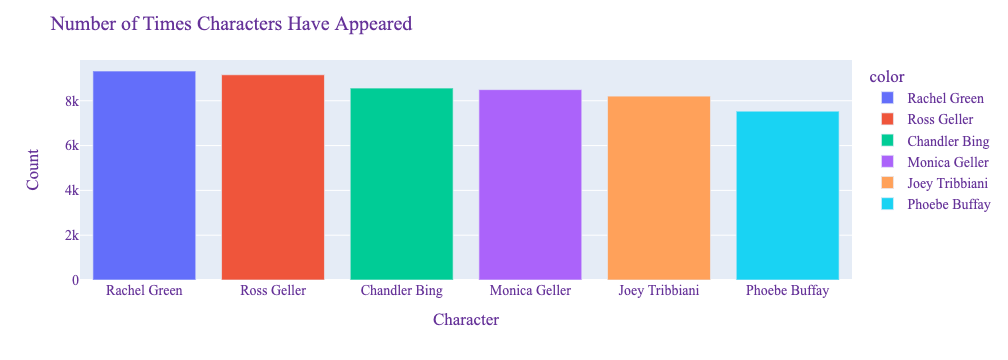

In [50]:
gh.plotly_bar(data = main_cast['character'].value_counts().sort_values(ascending=False),
             color = main_cast['character'].value_counts().sort_values(ascending=False).index,
             graph_title = "Number of Times Characters Have Appeared"
             )

In [41]:
by_season = main_cast.groupby('season')
val_counts_season = by_season['character'].value_counts()

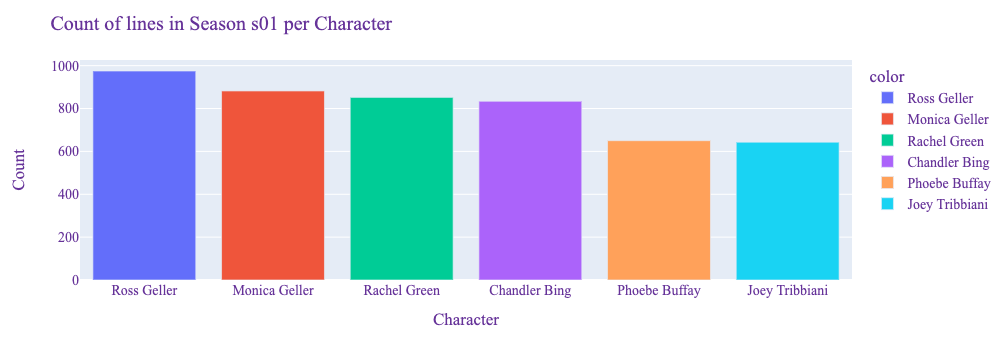

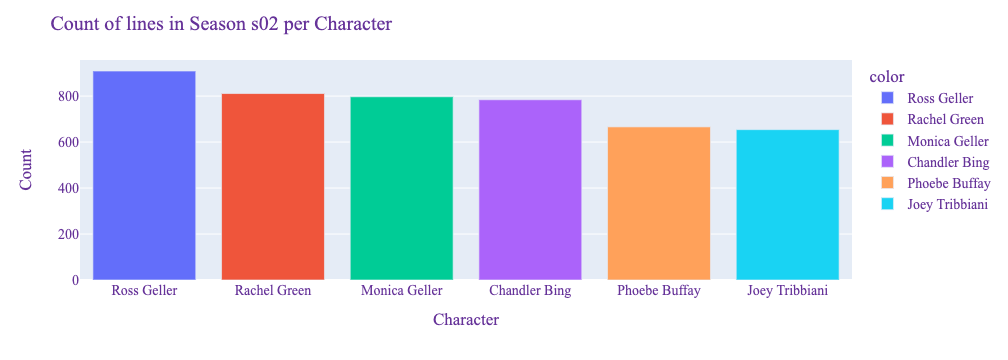

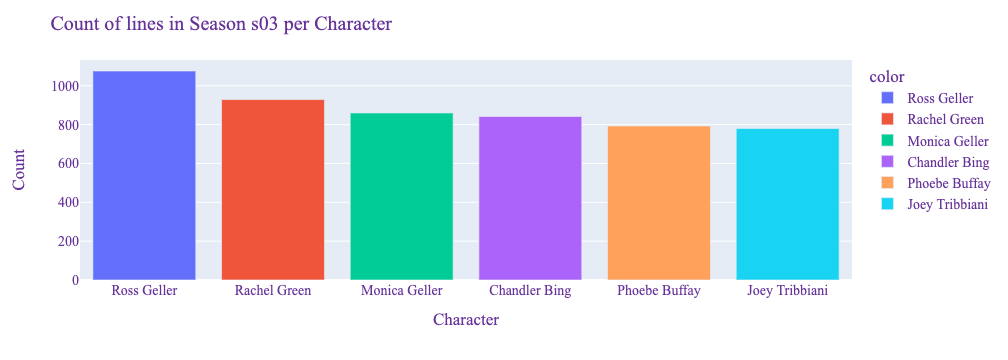

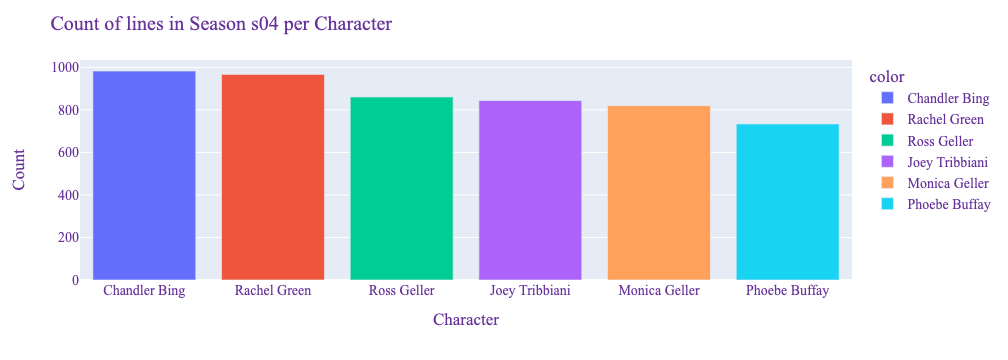

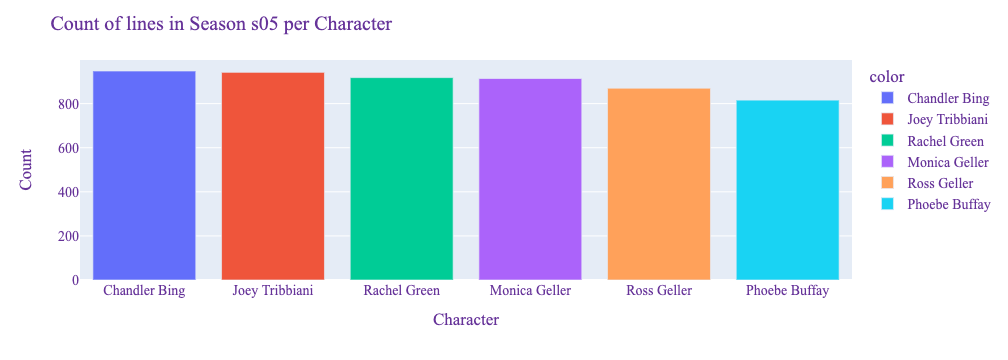

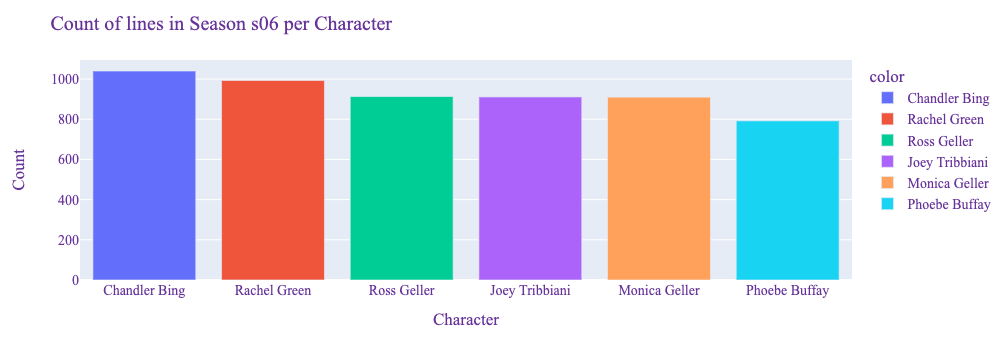

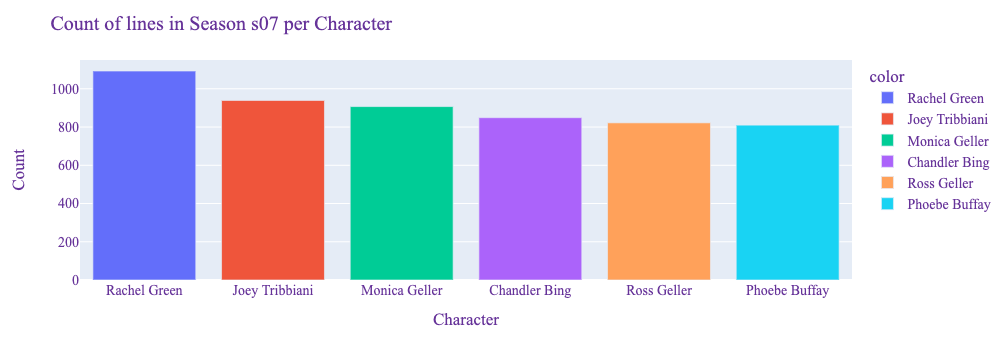

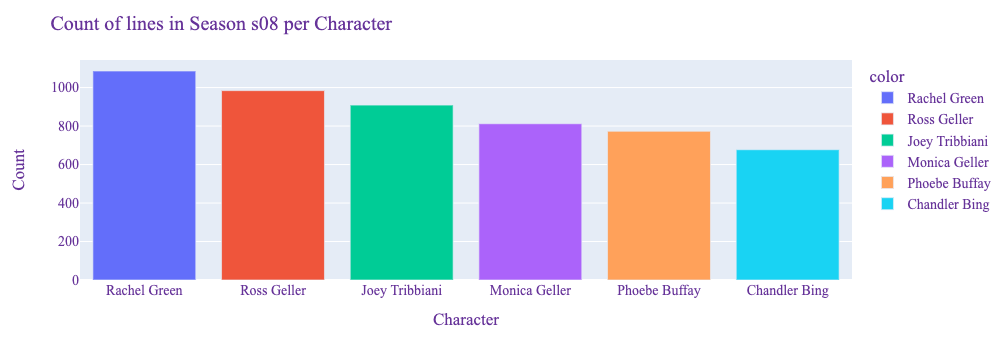

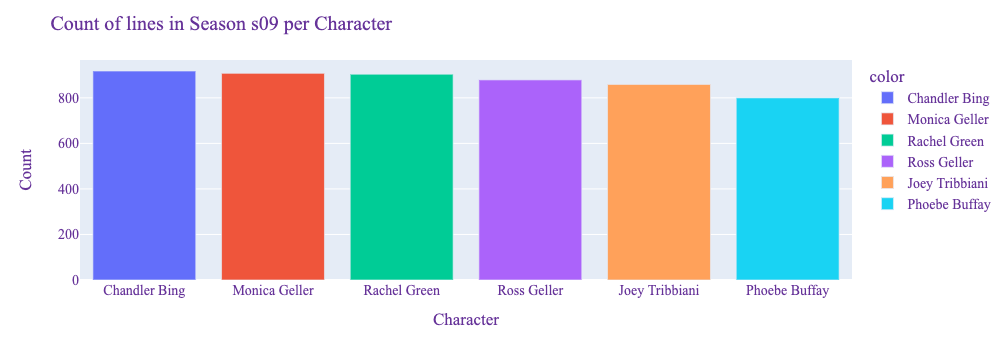

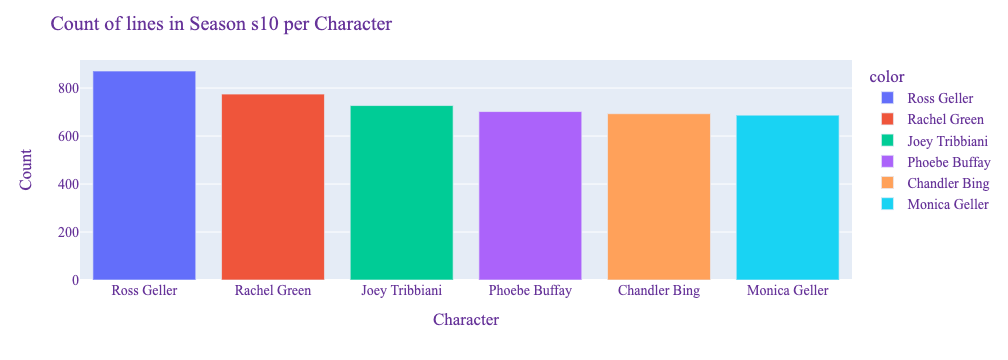

In [49]:
seasons = ['s01', 's02', 's03', 's04', 's05', 's06', 's07', 's08', 's09', 's10']
for i in seasons:
    gh.plotly_bar(data = val_counts_season[i],
                 color = val_counts_season[i].index,
                 graph_title = f"Count of lines in Season {i} per Character"
                 )

### Finding the Max, Min, Median, Average, and Standard Deviation of the Length and Word Count per Character

In [39]:
main_cast.groupby('character').max()

,season,episode,dialogue,length,word_count
character,,,,,
Chandler Bing,s10,e25,your ass?!?!?,602,111
Joey Tribbiani,s10,e25,your right! I love my life! I actually did sleep with her.,665,125
Monica Geller,s10,e25,you don't have insurance?,986,196
Phoebe Buffay,s10,e25,"you know maybe this is a wake up call, about your whole dating attitude. Your in your thirty's and you've never had a serious relationship and you have never been in a long term relationship, here you go from woman to woman, meaningless experience to meaningless experience never even worrying that it doesn't tern into anything serious.",750,146
Rachel Green,s10,e25,yeah-yeah-yeah!!,871,173
Ross Geller,s10,e25,you look great.,821,160


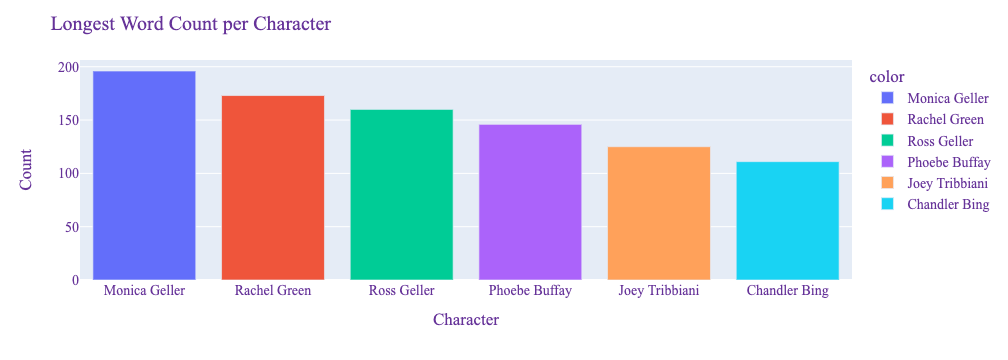

In [48]:
word_count_max = main_cast.groupby('character').max()['word_count'].sort_values(ascending=False)
gh.plotly_bar(data = word_count_max,
             color = word_count_max.index,
             graph_title = "Longest Word Count per Character"
             )

In [45]:
main_cast.groupby('character').min()

,season,episode,dialogue,length,word_count
character,,,,,
Chandler Bing,s01,e01,"""Benefits lapsed.""",1,1
Joey Tribbiani,s01,e01,"""...Amy! Happy birthday to you!""",2,1
Monica Geller,s01,e01,"""Delta Dawn""",3,1
Phoebe Buffay,s01,e01,"""...fuchsia and mauvvve. Those are the 66 colours of my bedroommmm."" Thank you, thank you. Ohh, and I invite you to count the colours in your bedroom. Except for you. You go away.",3,1
Rachel Green,s01,e01,"""...marenge, thank you honey, and do the cha-cha. And while she like to be a star, Tony always tended bar. At the, wait, wait, everybody..""",3,1
Ross Geller,s01,e01,"""... Sarah. I dig you"", Uh? ""Doctor Ross Geller"".",3,1


In [46]:
main_cast.groupby('character').mean()

,length,word_count
character,,
Chandler Bing,52.097923,10.135971
Joey Tribbiani,54.026316,10.542154
Monica Geller,49.962457,9.779805
Phoebe Buffay,55.466030,10.826300
Rachel Green,53.154052,10.469983
Ross Geller,54.022489,10.432969


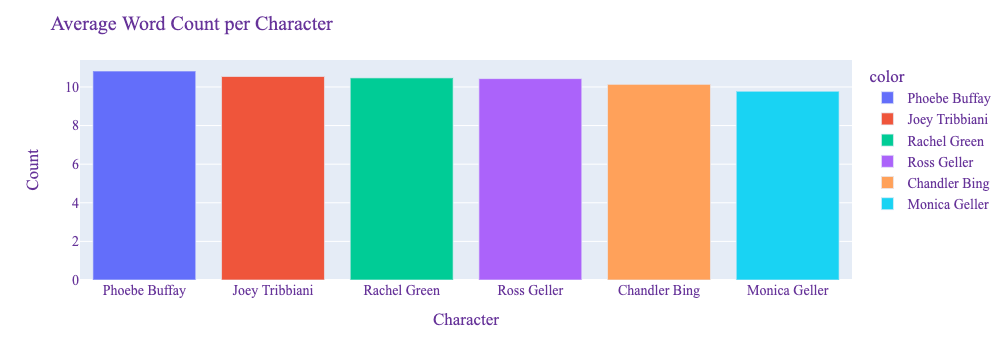

In [47]:
word_count_avg = main_cast.groupby('character').mean()['word_count'].sort_values(ascending=False)
gh.plotly_bar(data = word_count_avg,
             color = word_count_avg.index,
             graph_title = 'Average Word Count per Character'
             )

In [52]:
main_cast.groupby('character').median()

,length,word_count
character,,
Chandler Bing,38.0,7.0
Joey Tribbiani,38.0,7.0
Monica Geller,35.0,7.0
Phoebe Buffay,38.0,7.0
Rachel Green,36.0,7.0
Ross Geller,36.0,7.0


In [53]:
main_cast.groupby('character').std()

,length,word_count
character,,
Chandler Bing,51.856485,10.043994
Joey Tribbiani,55.383887,10.751179
Monica Geller,49.851702,9.682331
Phoebe Buffay,57.804257,11.161715
Rachel Green,57.951753,11.389248
Ross Geller,56.501294,10.841677


### Checking Number of Unique Elements in the Dialouge Column

In [54]:
main_cast['dialogue'].nunique() #Counting the number of unique elements in the whole column 

43154

In [55]:
main_cast.groupby('character').nunique()#checking per character 

,season,episode,dialogue,length,word_count
character,,,,,
Chandler Bing,10,25,7528,303,79
Joey Tribbiani,10,25,7235,300,82
Monica Geller,10,25,7412,285,77
Phoebe Buffay,10,25,6684,319,88
Rachel Green,10,25,7965,329,94
Ross Geller,10,25,7923,328,87


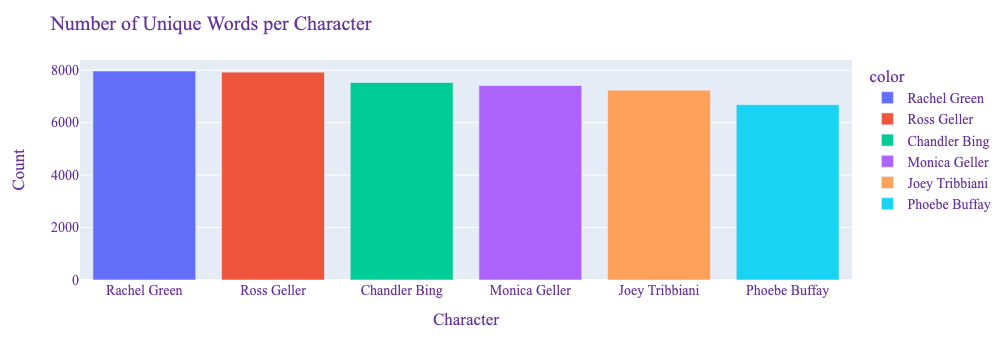

In [56]:
#plotting to see it in a graph 
unique_dialogue = main_cast.groupby('character').nunique()['dialogue'].sort_values(ascending=False)
gh.plotly_bar(data = unique_dialogue,
             color = unique_dialogue.index,
             graph_title = 'Number of Unique Words per Character'
             )

In [ ]:
# df = (main_cast.set_index('character')['dialogue']
#         .str.split(expand=True)
#         .stack()
#         .reset_index(level=1, drop=True)
#         .reset_index(name='dialogue')
#         .drop_duplicates()
#        )
# df

### Do more EDA

In [59]:
main_cast[['season','episode','character','dialogue']].to_csv('../Datasets/friends-modeling.csv', index=False)

### Sentiment Analysis per Character

In [60]:
sa = SentimentIntensityAnalyzer()

In [61]:
main_cast.head()

,season,episode,character,dialogue,length,word_count
0,s01,e01,Monica Geller,There's nothing to tell! He's just some guy I work with!,56,11
1,s01,e01,Joey Tribbiani,"C'mon, you're going out with the guy! There's gotta be something wrong with him!",80,14
2,s01,e01,Chandler Bing,"All right Joey, be nice. So does he have a hump? A hump and a hairpiece?",72,16
3,s01,e01,Phoebe Buffay,"Wait, does he eat chalk?",24,5
4,s01,e01,Phoebe Buffay,"Just, 'cause, I don't want her to go through what I went through with Carl- oh!",79,16


In [62]:
main_cast = main_cast.drop(columns=['length', 'word_count'])
sa_dia = [sa.polarity_scores(d) for d in main_cast['dialogue']]
sa_df = pd.DataFrame(sa_dia)

In [63]:
df = pd.concat([main_cast, sa_df], axis=1)

In [64]:
df.head()

,season,episode,character,dialogue,neg,neu,pos,compound
0,s01,e01,Monica Geller,There's nothing to tell! He's just some guy I work with!,0.000,1.000,0.000,0.0000
1,s01,e01,Joey Tribbiani,"C'mon, you're going out with the guy! There's gotta be something wrong with him!",0.221,0.779,0.000,-0.5696
2,s01,e01,Chandler Bing,"All right Joey, be nice. So does he have a hump? A hump and a hairpiece?",0.000,0.792,0.208,0.4871
3,s01,e01,Phoebe Buffay,"Wait, does he eat chalk?",0.000,1.000,0.000,0.0000
4,s01,e01,Phoebe Buffay,"Just, 'cause, I don't want her to go through what I went through with Carl- oh!",0.104,0.896,0.000,-0.1316


In [65]:
df.loc[df['pos'] > 0.5]

,season,episode,character,dialogue,neg,neu,pos,compound
18,s01,e01,Monica Geller,"Are you okay, sweetie?",0.0,0.282,0.718,0.6249
24,s01,e01,Ross Geller,Thanks.,0.0,0.000,1.000,0.4404
27,s01,e01,Phoebe Buffay,Fine! Be murky!,0.0,0.456,0.544,0.3365
28,s01,e01,Ross Geller,"I'll be fine, alright? Really, everyone. I hope she'll be very happy.",0.0,0.390,0.610,0.8742
44,s01,e01,Rachel Green,"Hi, sure!",0.0,0.278,0.722,0.3802
...,...,...,...,...,...,...,...,...
51278,s10,e18,Ross Geller,Wow.,0.0,0.000,1.000,0.5859
51283,s10,e18,Monica Geller,"Oh, yeah, that's true.",0.0,0.286,0.714,0.6124
51288,s10,e18,Chandler Bing,"Oh, okay.",0.0,0.345,0.655,0.2263
51290,s10,e18,Joey Tribbiani,Yeah. I guess so.,0.0,0.476,0.524,0.2960


In [66]:
df.loc[df['neg'] > 0.5]

,season,episode,character,dialogue,neg,neu,pos,compound
12,s01,e01,Phoebe Buffay,No.,1.000,0.000,0.00,-0.2960
29,s01,e01,Monica Geller,No you don't.,0.524,0.476,0.00,-0.2960
36,s01,e01,Ross Geller,Sorry.,1.000,0.000,0.00,-0.0772
110,s01,e01,Chandler Bing,I have no idea.,0.524,0.476,0.00,-0.2960
119,s01,e01,Joey Tribbiani,You got screwed.,0.615,0.385,0.00,-0.4939
...,...,...,...,...,...,...,...,...
51173,s10,e18,Ross Geller,"Phoebe! Wow! No, no, no!",0.609,0.081,0.31,-0.3971
51224,s10,e18,Ross Geller,"No, no, no, but...",0.868,0.132,0.00,-0.6808
51238,s10,e18,Ross Geller,"No, you don't.",0.524,0.476,0.00,-0.2960
51240,s10,e18,Ross Geller,"No, you don't.",0.524,0.476,0.00,-0.2960


In [67]:
df.loc[df['neu'] == 0.5]

,season,episode,character,dialogue,neg,neu,pos,compound
277,s01,e02,Ross Geller,"No, it's good, it is good, it's just that- mm- doesn't she seem a little angry?",0.237,0.5,0.264,0.1513
810,s01,e04,Monica Geller,I think he's shy.,0.500,0.5,0.000,-0.2500
1382,s01,e07,Phoebe Buffay,He seems to hate you. Are you sure?,0.308,0.5,0.192,-0.3400
1822,s01,e10,Ross Geller,My friend Bethel rescued him from some lab.,0.000,0.5,0.500,0.7184
1962,s01,e10,Phoebe Buffay,Are you alright?,0.000,0.5,0.500,0.2500
...,...,...,...,...,...,...,...,...
46702,s09,e24,Chandler Bing,"Oh dear God, there's two of them!",0.000,0.5,0.500,0.6114
47701,s10,e04,Monica Geller,"Alright, 5 more minutes.",0.000,0.5,0.500,0.2500
48150,s10,e06,Ross Geller,"Well, I... I am having a good hair day.",0.000,0.5,0.500,0.6124
48305,s10,e07,Ross Geller,"Yeah, and I'm responsible for just like half of that.",0.000,0.5,0.500,0.7184


In [68]:
df.loc[(df['neg']== 0.5) & (df['pos']== 0.5)]

,season,episode,character,dialogue,neg,neu,pos,compound
23496,s05,e17,Joey Tribbiani,Yeah! No?,0.5,0.0,0.5,0.0


In [69]:
df.loc[df['neu']== 1]

,season,episode,character,dialogue,neg,neu,pos,compound
0,s01,e01,Monica Geller,There's nothing to tell! He's just some guy I work with!,0.0,1.0,0.0,0.0
3,s01,e01,Phoebe Buffay,"Wait, does he eat chalk?",0.0,1.0,0.0,0.0
8,s01,e01,Chandler Bing,"Then I look down, and I realize there's a phone... there.",0.0,1.0,0.0,0.0
9,s01,e01,Joey Tribbiani,Instead of...?,0.0,1.0,0.0,0.0
10,s01,e01,Chandler Bing,That's right.,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
51286,s10,e18,Ross Geller,Do you realise we almost made it ten years without that coming up?,0.0,1.0,0.0,0.0
51289,s10,e18,Phoebe Buffay,"So, I guess this is it.",0.0,1.0,0.0,0.0
51291,s10,e18,Monica Geller,This is harder than I thought it would be.,0.0,1.0,0.0,0.0
51293,s10,e18,Rachel Green,"Do you guys have to go to the new house right away, or do you have some time?",0.0,1.0,0.0,0.0


In [70]:
df[df['neu']== 1].sort_values(by='character', ascending=False)

,season,episode,character,dialogue,neg,neu,pos,compound
25168,s05,e24,Ross Geller,Uh-hmm.,0.0,1.0,0.0,0.0
40682,s08,e20,Ross Geller,"Uh, what?",0.0,1.0,0.0,0.0
40656,s08,e20,Ross Geller,Ben Franklin.,0.0,1.0,0.0,0.0
13106,s03,e17,Ross Geller,Obviously not to Joey.,0.0,1.0,0.0,0.0
40658,s08,e20,Ross Geller,Queen Victoria.,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
39150,s08,e13,Chandler Bing,I'm not going to let you say anything.,0.0,1.0,0.0,0.0
39148,s08,e13,Chandler Bing,You don't say anything.,0.0,1.0,0.0,0.0
14966,s04,e02,Chandler Bing,Nooo.,0.0,1.0,0.0,0.0
39143,s08,e13,Chandler Bing,Because he was looking at her differently.,0.0,1.0,0.0,0.0


In [71]:
df.loc[df['neg']== 1]

,season,episode,character,dialogue,neg,neu,pos,compound
12,s01,e01,Phoebe Buffay,No.,1.0,0.0,0.0,-0.2960
36,s01,e01,Ross Geller,Sorry.,1.0,0.0,0.0,-0.0772
159,s01,e01,Monica Geller,Stop!,1.0,0.0,0.0,-0.3595
236,s01,e01,Rachel Green,Sorry-,1.0,0.0,0.0,-0.0772
280,s01,e02,Ross Geller,No. No.,1.0,0.0,0.0,-0.5267
...,...,...,...,...,...,...,...,...
50286,s10,e14,Rachel Green,Ugh.,1.0,0.0,0.0,-0.4215
50305,s10,e14,Chandler Bing,No!,1.0,0.0,0.0,-0.3595
50318,s10,e14,Monica Geller,No.,1.0,0.0,0.0,-0.2960
50547,s10,e16,Joey Tribbiani,Damnit!,1.0,0.0,0.0,-0.5707


In [72]:
df.loc[df['pos']== 1]

,season,episode,character,dialogue,neg,neu,pos,compound
24,s01,e01,Ross Geller,Thanks.,0.0,0.0,1.0,0.4404
77,s01,e01,Monica Geller,Yes!,0.0,0.0,1.0,0.4574
100,s01,e01,Ross Geller,"Okay, sure.",0.0,0.0,1.0,0.4939
151,s01,e01,Joey Tribbiani,Congratulations.,0.0,0.0,1.0,0.5994
231,s01,e01,Ross Geller,Yeah.,0.0,0.0,1.0,0.2960
...,...,...,...,...,...,...,...,...
51197,s10,e18,Rachel Green,"Yeah, okay.",0.0,0.0,1.0,0.4767
51203,s10,e18,Joey Tribbiani,Yeah.,0.0,0.0,1.0,0.2960
51207,s10,e18,Joey Tribbiani,Yeah.,0.0,0.0,1.0,0.2960
51230,s10,e18,Rachel Green,Yeah?,0.0,0.0,1.0,0.2960


In [73]:
char_mean_sentiment = df.groupby(by='character').mean()
char_mean_sentiment

,neg,neu,pos,compound
character,,,,
Chandler Bing,0.065515,0.763327,0.171043,0.121996
Joey Tribbiani,0.062141,0.769607,0.168251,0.129679
Monica Geller,0.063951,0.772543,0.163504,0.118294
Phoebe Buffay,0.068522,0.740902,0.190575,0.145813
Rachel Green,0.062099,0.747142,0.190760,0.146533
Ross Geller,0.067088,0.758931,0.173983,0.132756


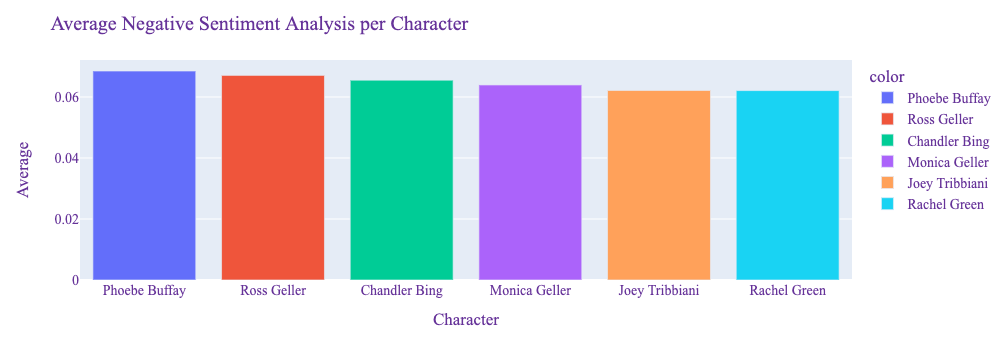

In [77]:
#Plotting the negative Sentiment 
gh.plotly_bar(data = char_mean_sentiment.sort_values(by='neg', ascending=False)['neg'],
             color = char_mean_sentiment.sort_values(by='neg', ascending=False).index,
             graph_title = 'Average Negative Sentiment Analysis per Character',
             y_axis_title = 'Average')

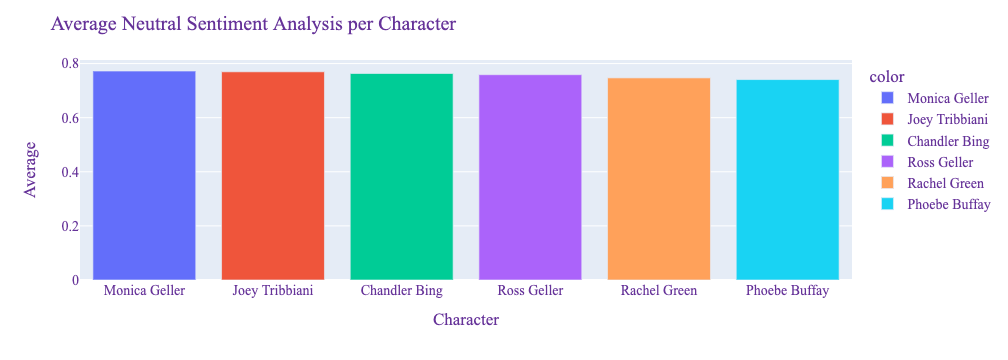

In [78]:
#Plotting the Neutral Sentiment
gh.plotly_bar(data = char_mean_sentiment.sort_values(by = 'neu', ascending=False)['neu'],
             color = char_mean_sentiment.sort_values(by='neu', ascending=False).index,
             graph_title = 'Average Neutral Sentiment Analysis per Character',
             y_axis_title = 'Average')

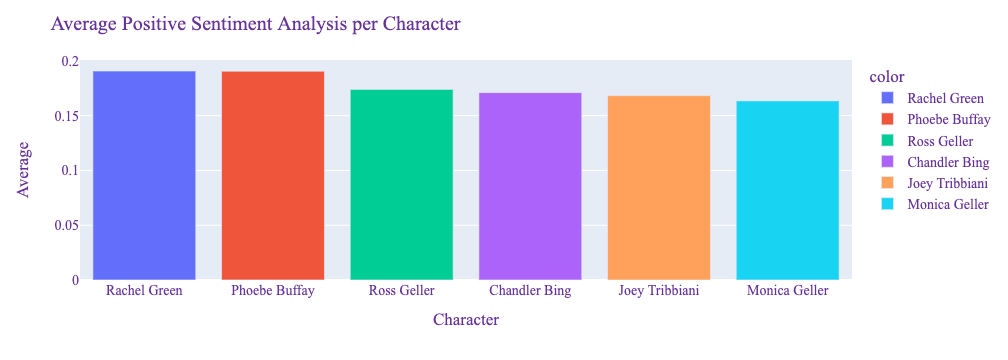

In [81]:
#plotting the positive sentiment mean 
gh.plotly_bar(data = char_mean_sentiment.sort_values(by='pos', ascending=False)['pos'],
             color = char_mean_sentiment.sort_values(by='pos', ascending=False).index,
             graph_title = "Average Positive Sentiment Analysis per Character",
             y_axis_title = 'Average')

In [82]:
char_max_sentiment = df.groupby(by='character').max()
char_max_sentiment

,season,episode,dialogue,neg,neu,pos,compound
character,,,,,,,
Chandler Bing,s10,e25,your ass?!?!?,1.0,1.0,1.0,0.9806
Joey Tribbiani,s10,e25,your right! I love my life! I actually did sleep with her.,1.0,1.0,1.0,0.9924
Monica Geller,s10,e25,you don't have insurance?,1.0,1.0,1.0,0.9846
Phoebe Buffay,s10,e25,"you know maybe this is a wake up call, about your whole dating attitude. Your in your thirty's and you've never had a serious relationship and you have never been in a long term relationship, here you go from woman to woman, meaningless experience to meaningless experience never even worrying that it doesn't tern into anything serious.",1.0,1.0,1.0,0.9917
Rachel Green,s10,e25,yeah-yeah-yeah!!,1.0,1.0,1.0,0.9923
Ross Geller,s10,e25,you look great.,1.0,1.0,1.0,0.9904


In [85]:
char_min_sentiment = df.groupby(by='character').min()
char_min_sentiment

,season,episode,dialogue,neg,neu,pos,compound
character,,,,,,,
Chandler Bing,s01,e01,"""Benefits lapsed.""",0.0,0.0,0.0,-0.9782
Joey Tribbiani,s01,e01,"""...Amy! Happy birthday to you!""",0.0,0.0,0.0,-0.9825
Monica Geller,s01,e01,"""Delta Dawn""",0.0,0.0,0.0,-0.9614
Phoebe Buffay,s01,e01,"""...fuchsia and mauvvve. Those are the 66 colours of my bedroommmm."" Thank you, thank you. Ohh, and I invite you to count the colours in your bedroom. Except for you. You go away.",0.0,0.0,0.0,-0.9794
Rachel Green,s01,e01,"""...marenge, thank you honey, and do the cha-cha. And while she like to be a star, Tony always tended bar. At the, wait, wait, everybody..""",0.0,0.0,0.0,-0.9673
Ross Geller,s01,e01,"""... Sarah. I dig you"", Uh? ""Doctor Ross Geller"".",0.0,0.0,0.0,-0.9391
